In [20]:
from data_xml import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [27]:
loader=Loader("C:/Users/dexte/Documents/AI/XML_sensors/sensor_P40")
frame=loader.getByExperiment()
def gatherTrials(frame):
    vals=max(frame['Trial'])
    dataset=np.zeros((int(vals),100,16))
    for i in range(int(vals)):
        trials=frame[frame['Trial'] == str(i)]
        readings=np.stack(trials["Readings"].apply(np.array))
        #print(readings.shape)
        dataset[i]=readings
    print(dataset.shape)
    return dataset
data=gatherTrials(frame)

(99, 100, 16)


## Visualise

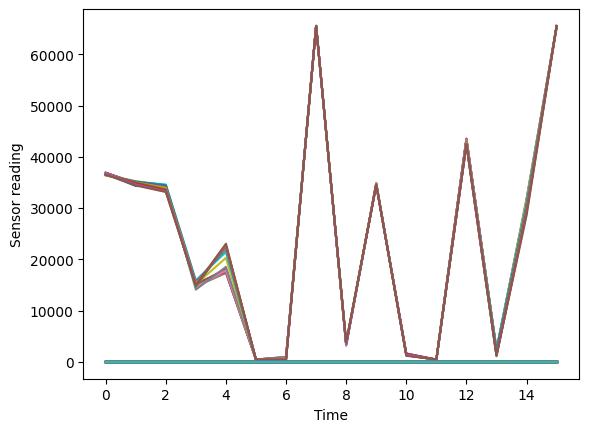

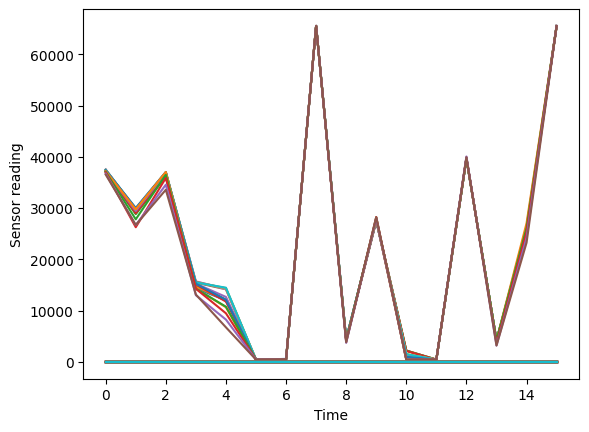

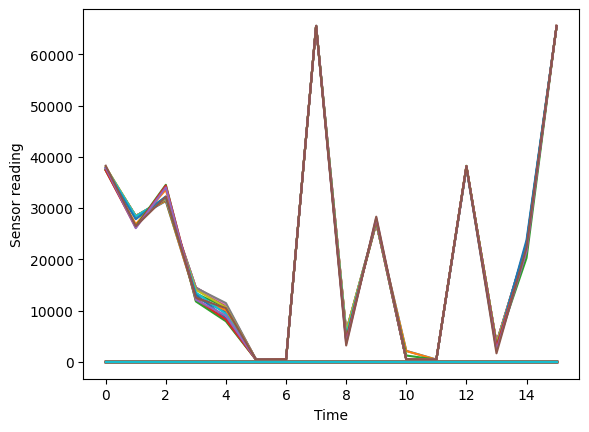

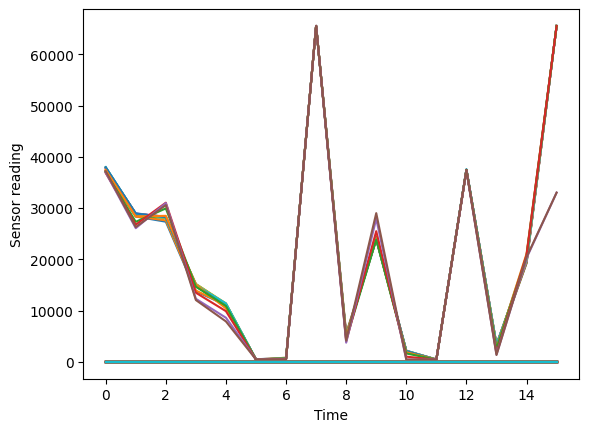

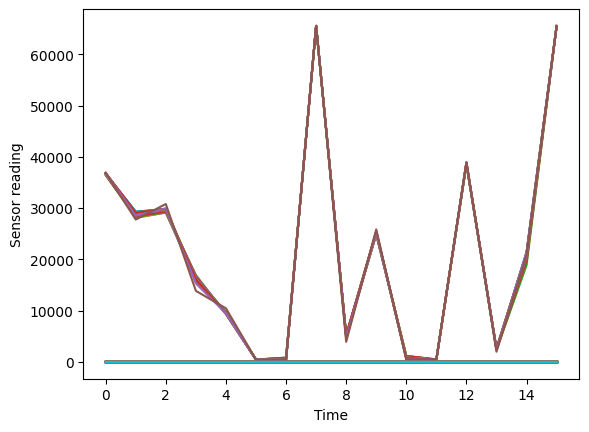

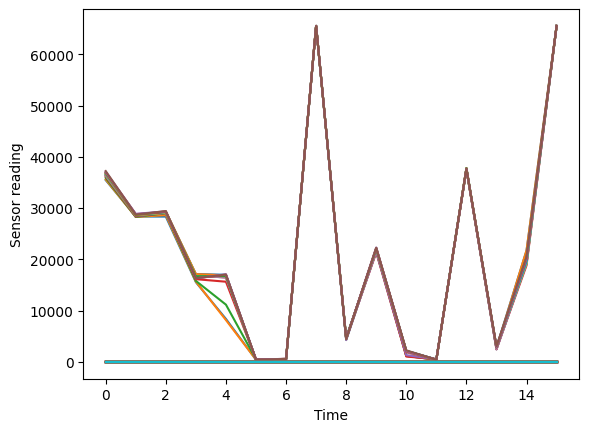

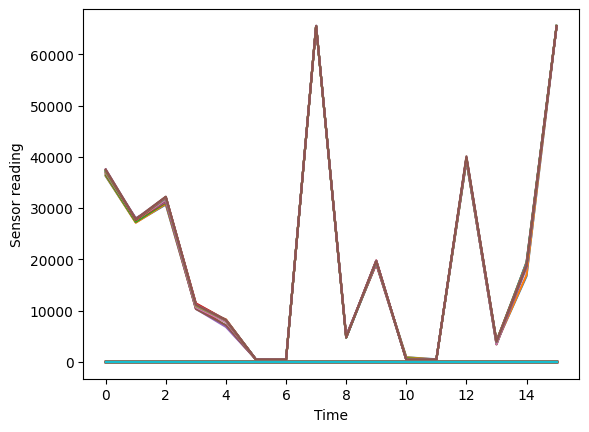

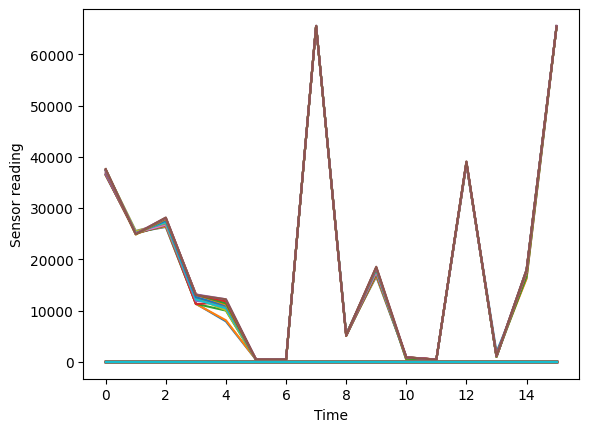

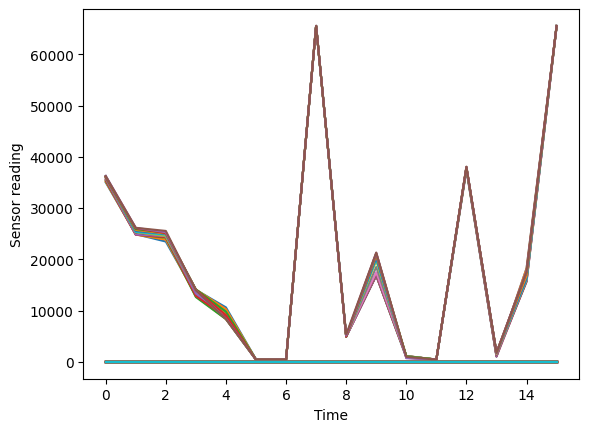

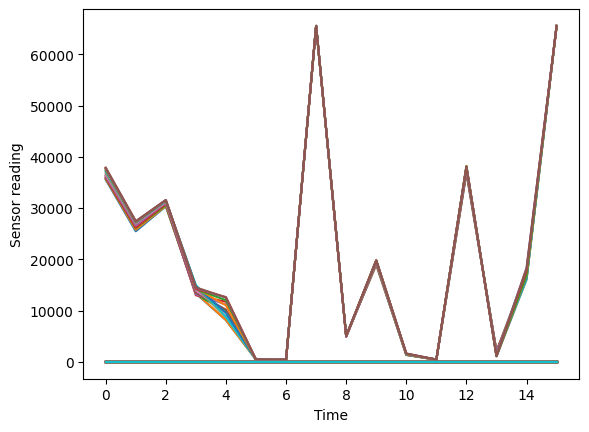

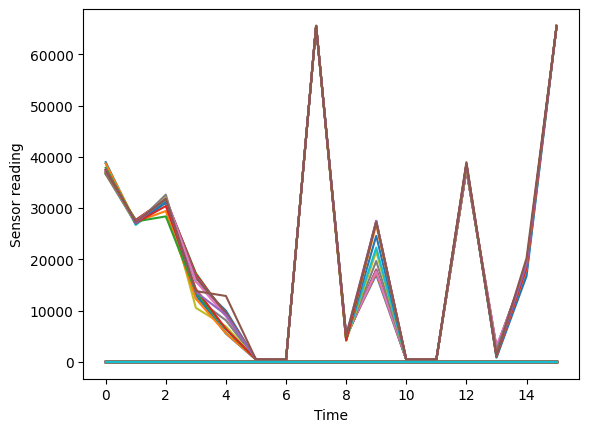

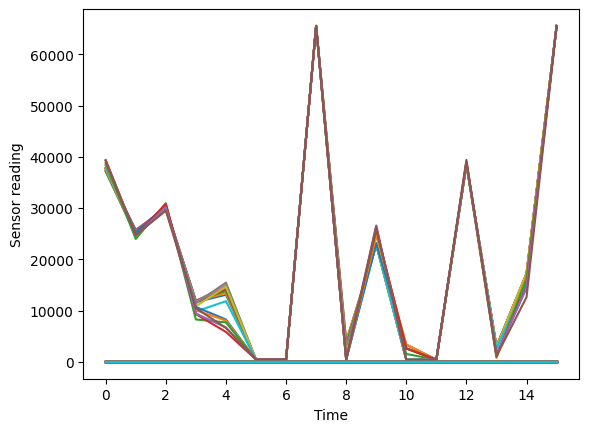

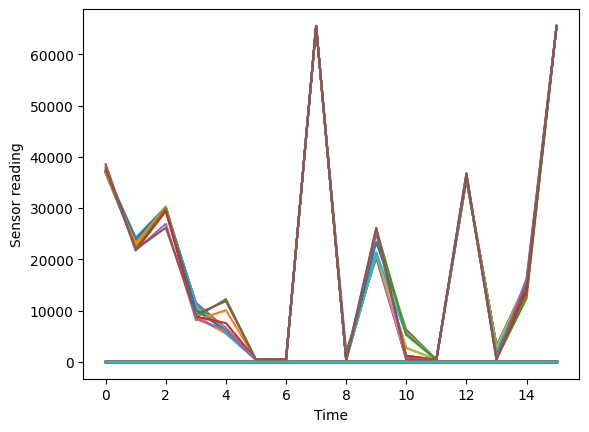

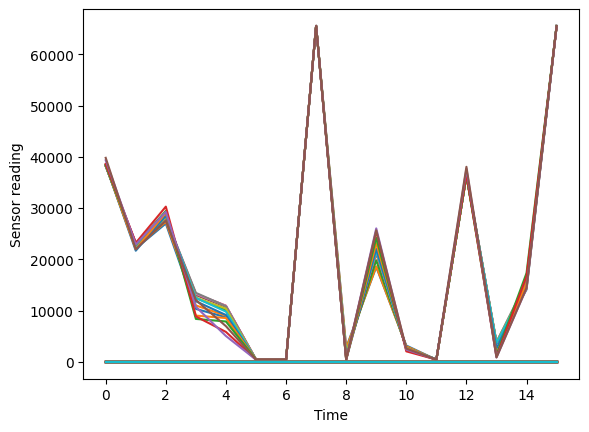

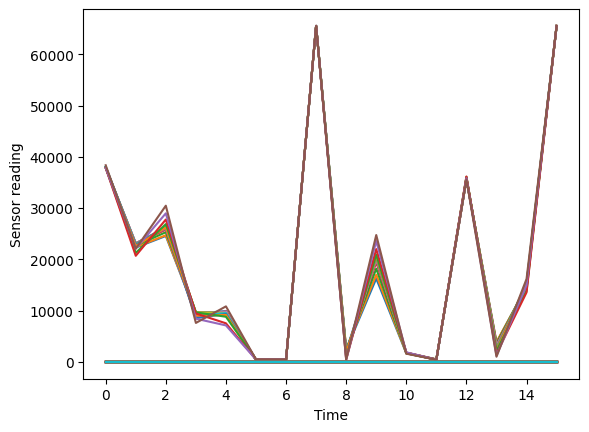

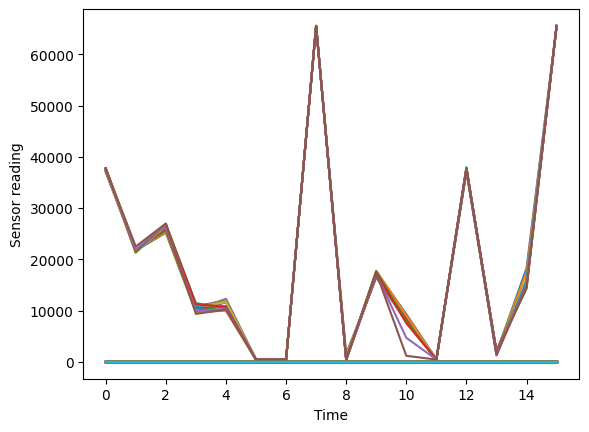

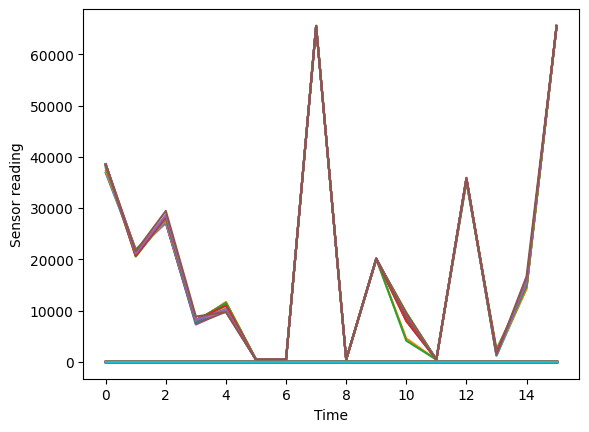

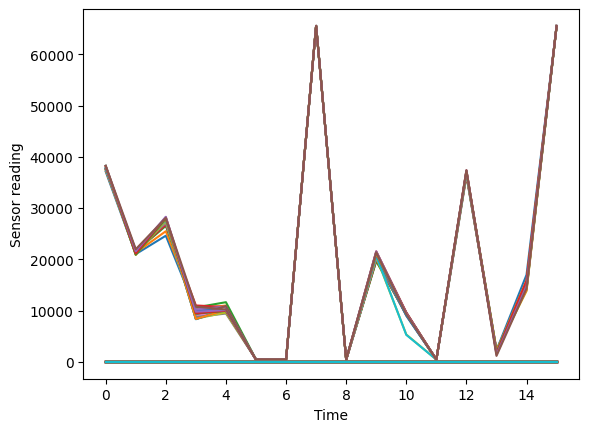

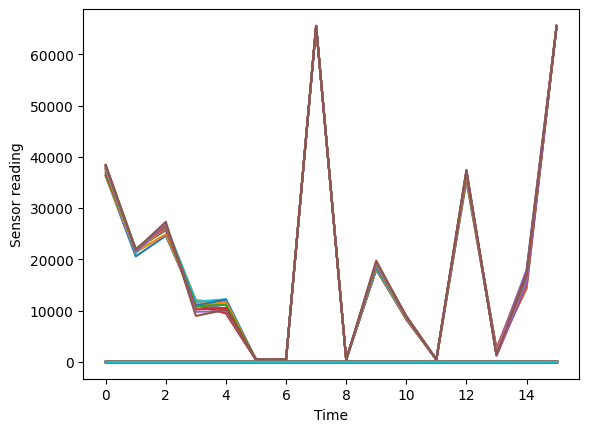

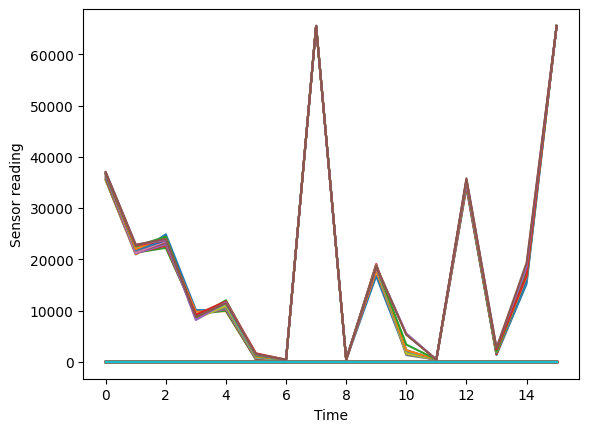

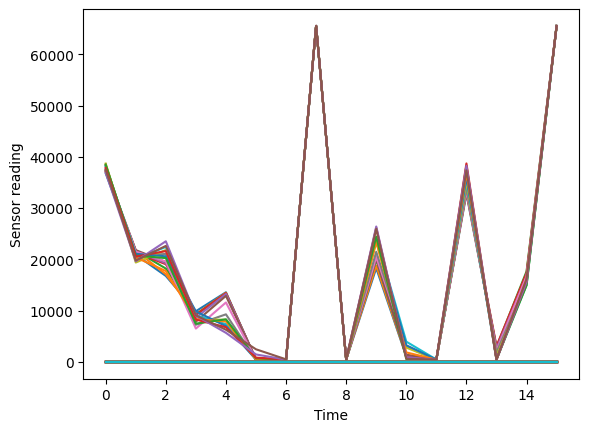

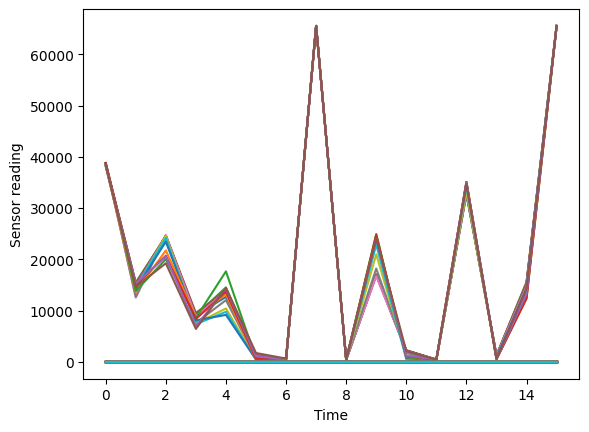

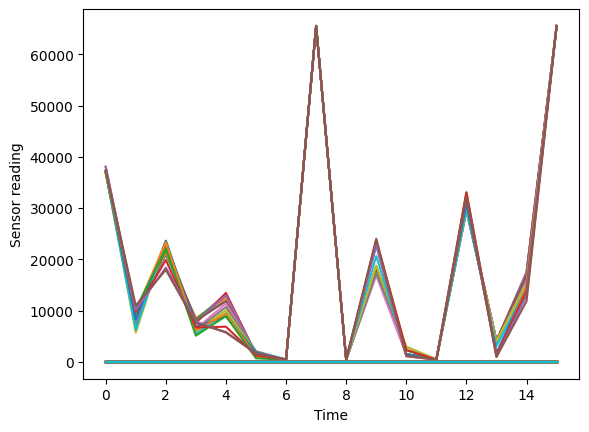

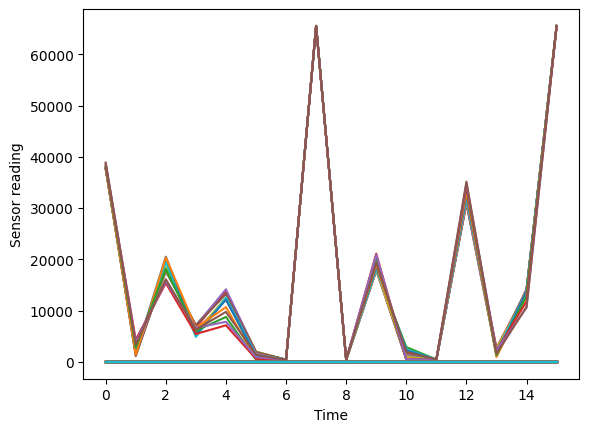

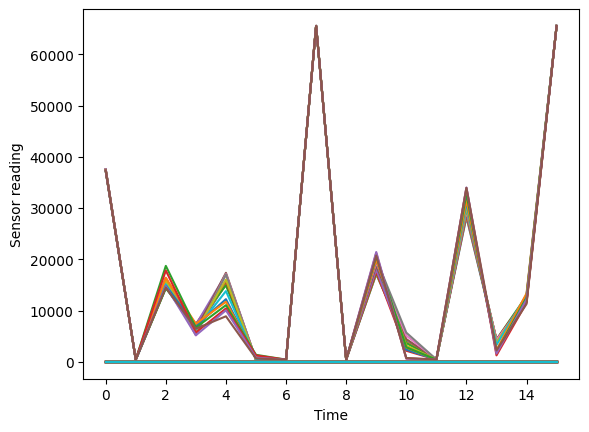

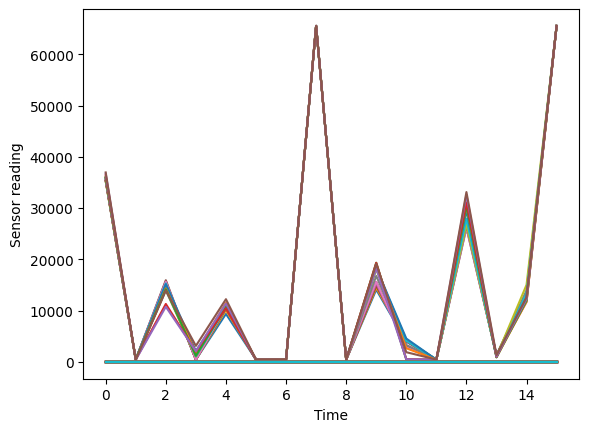

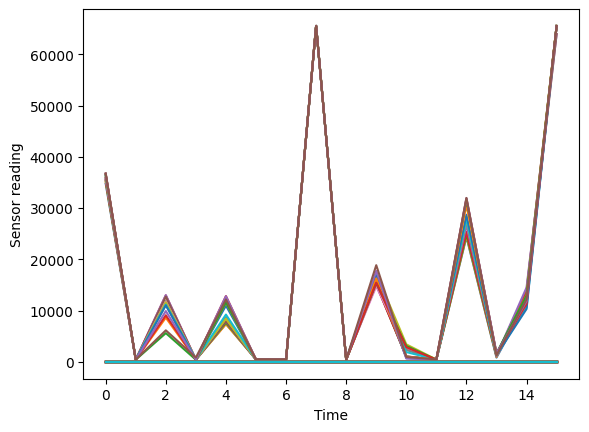

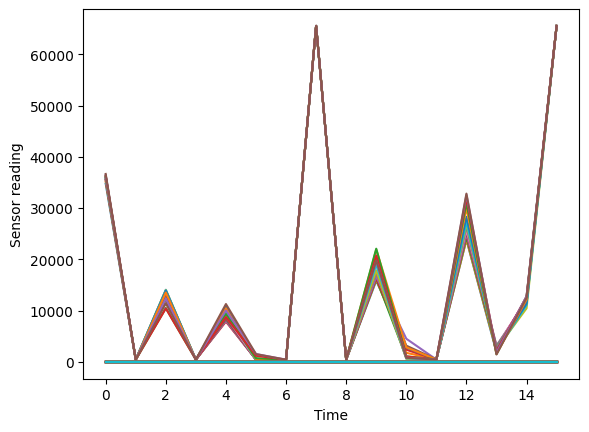

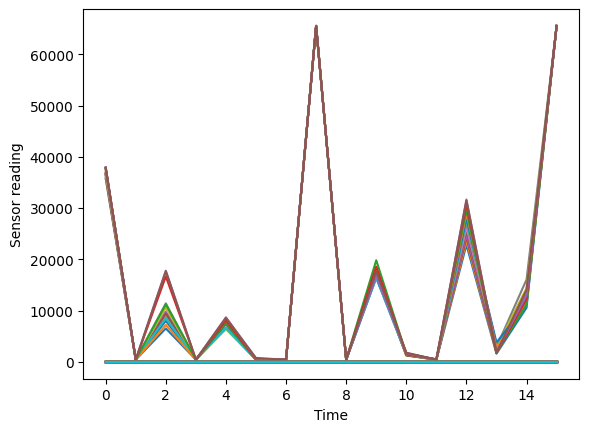

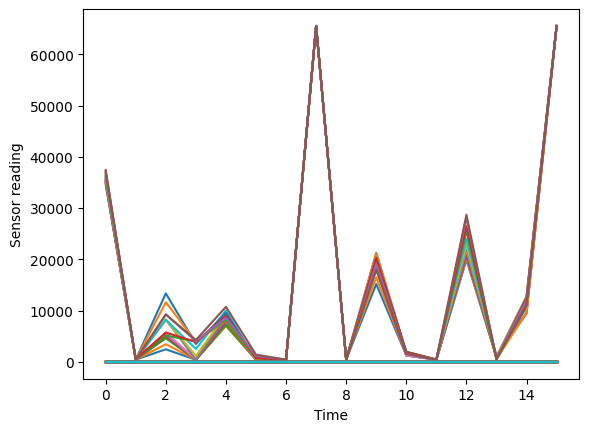

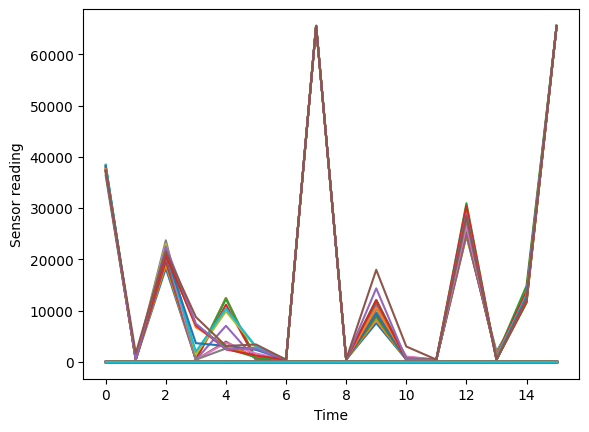

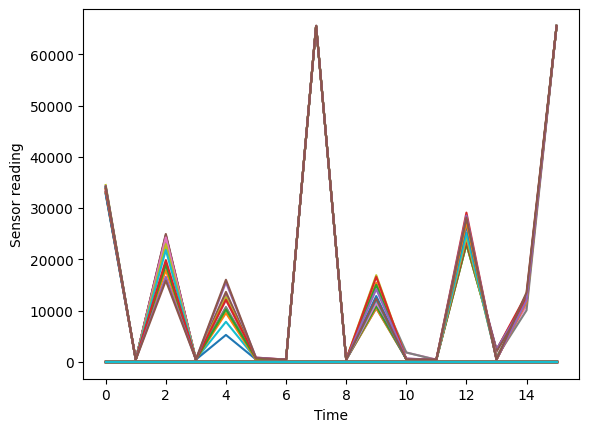

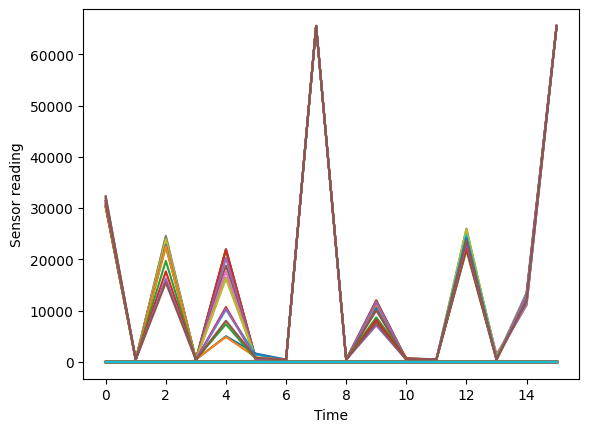

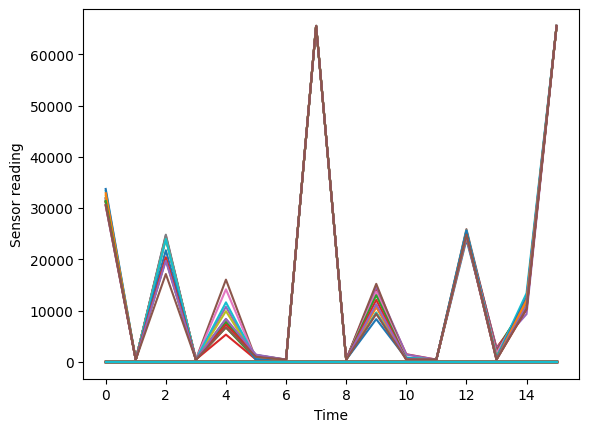

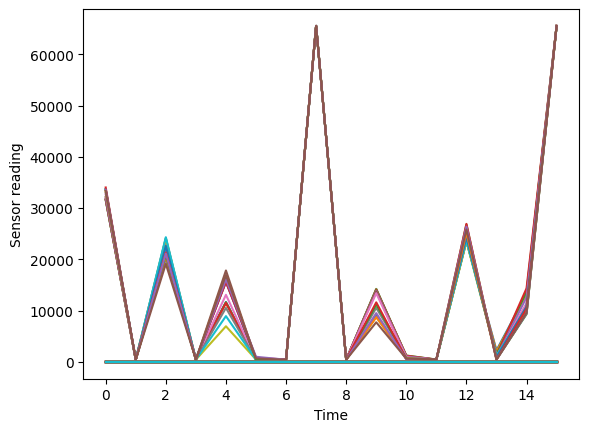

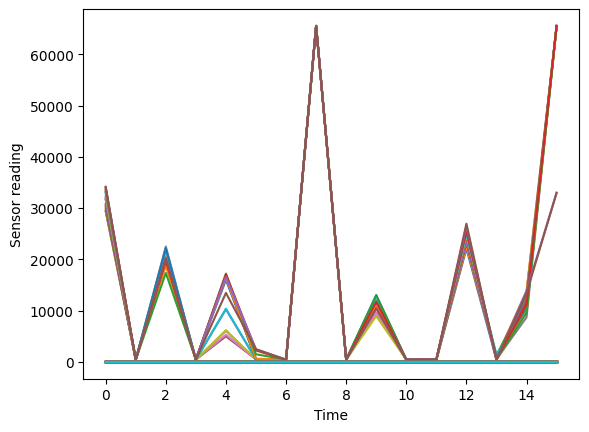

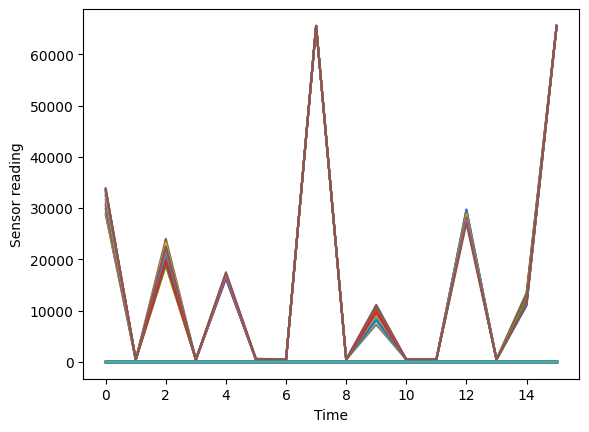

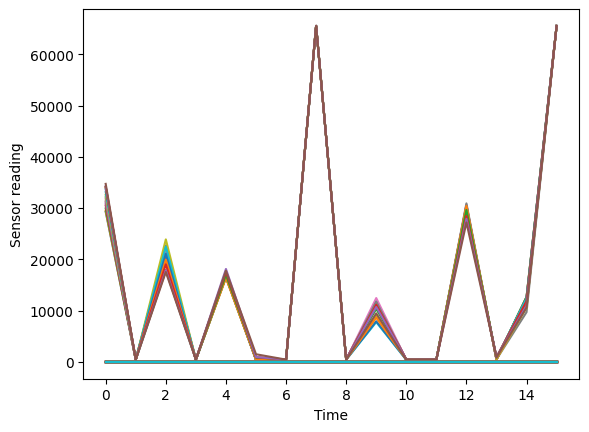

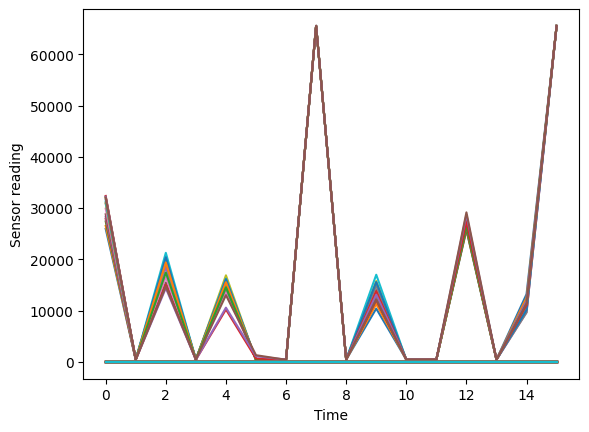

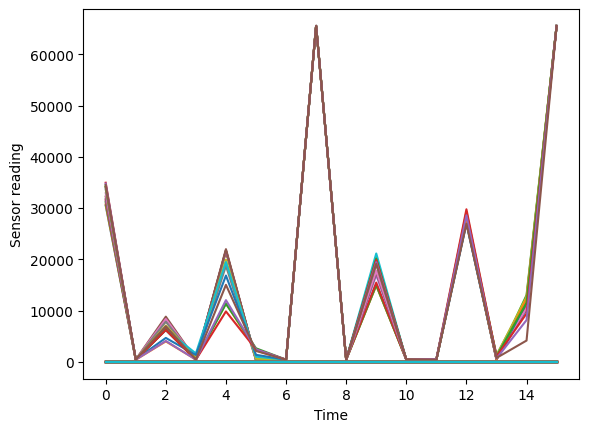

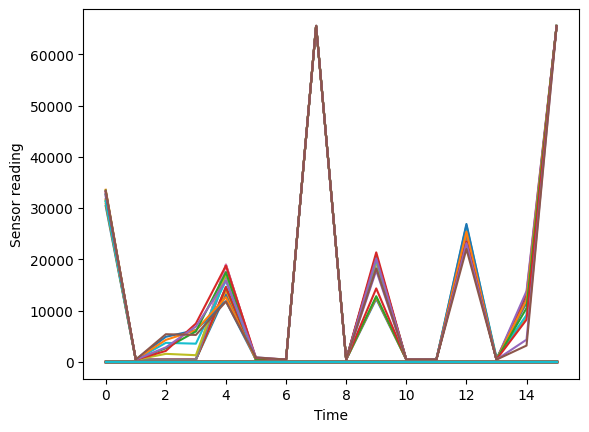

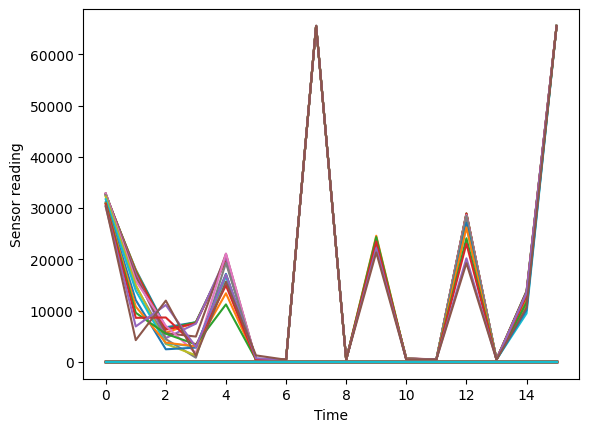

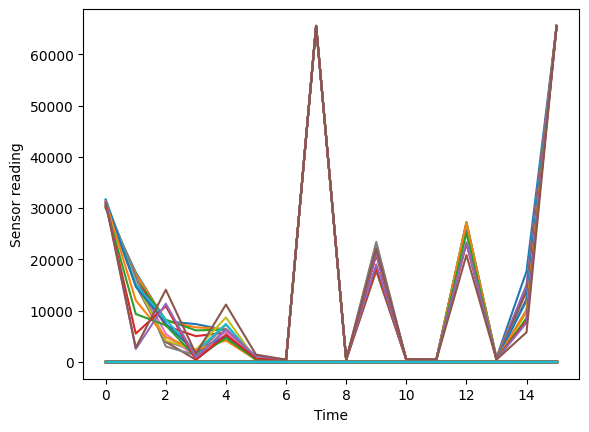

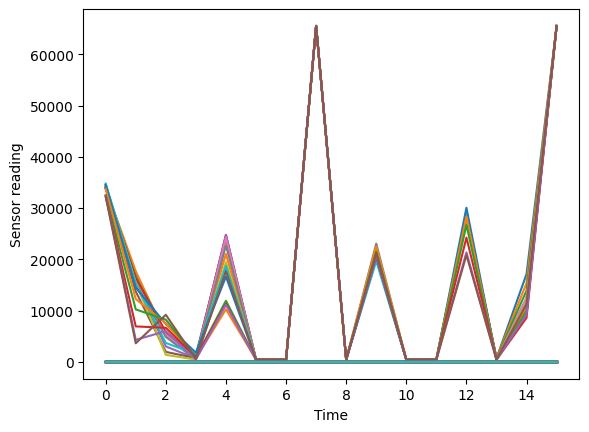

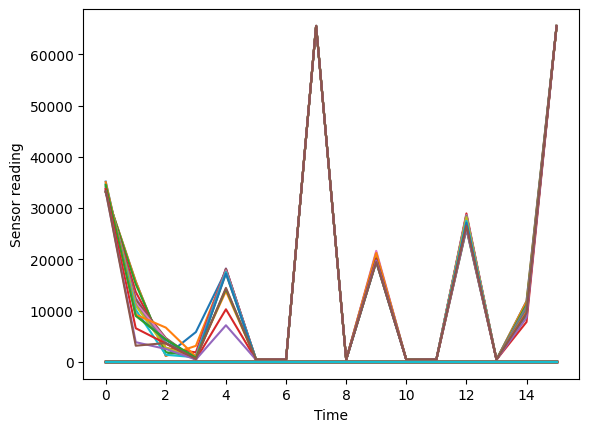

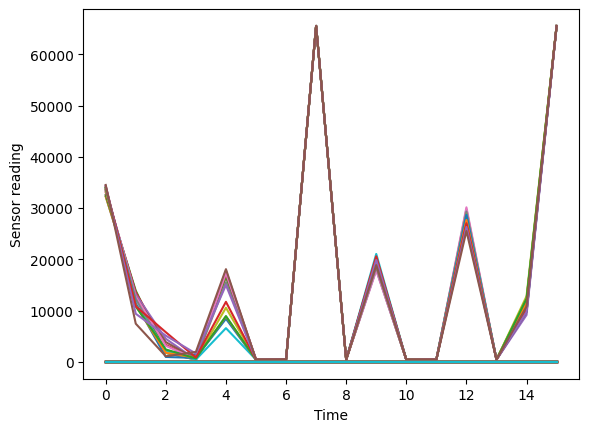

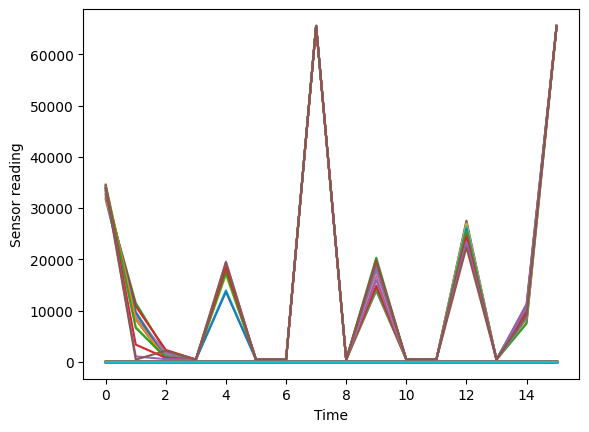

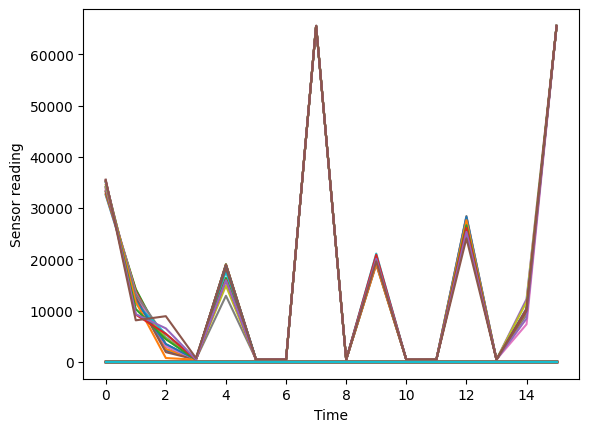

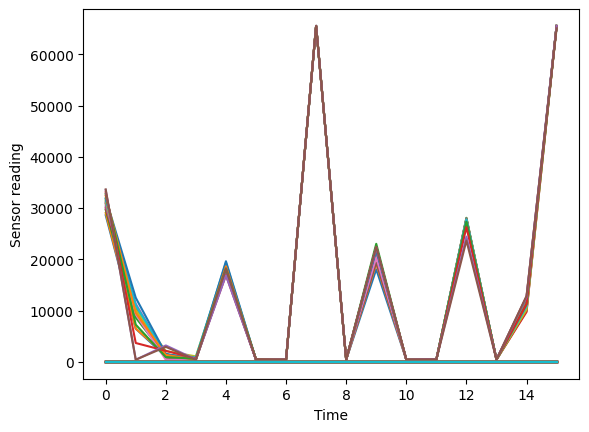

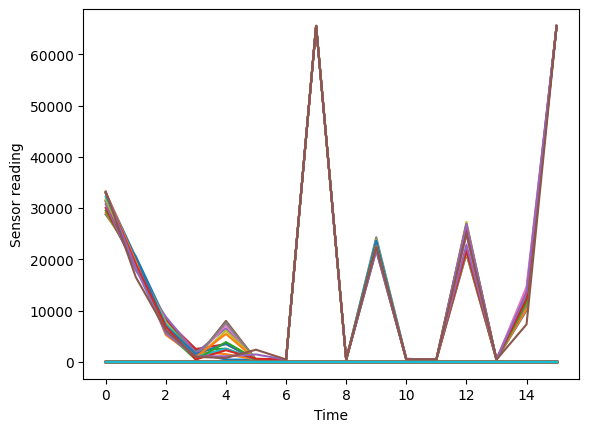

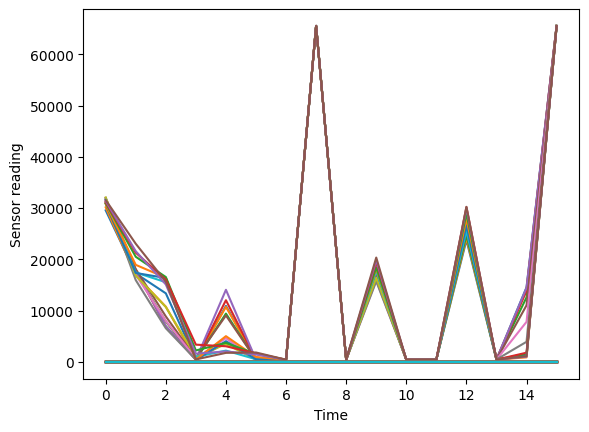

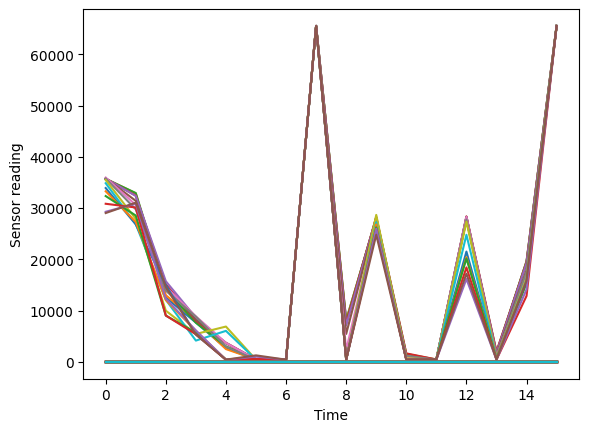

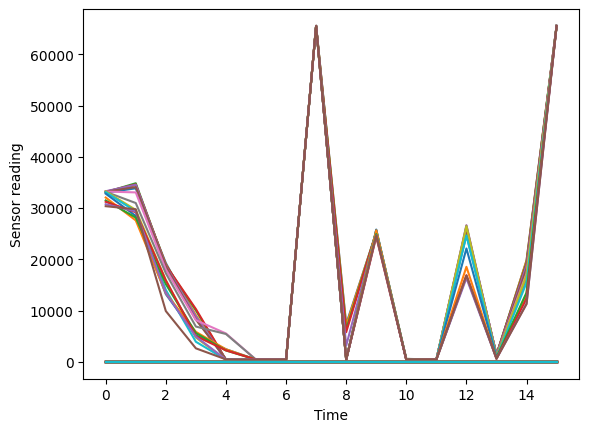

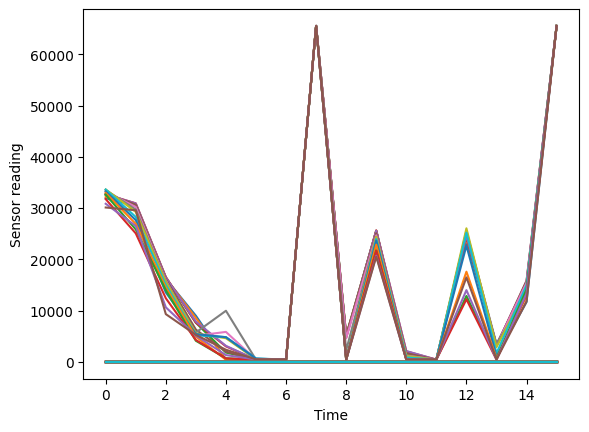

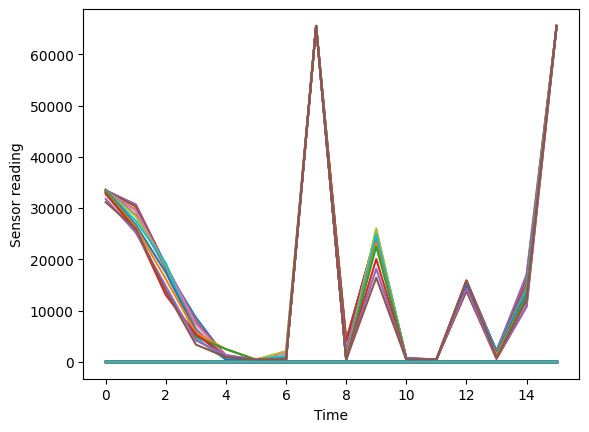

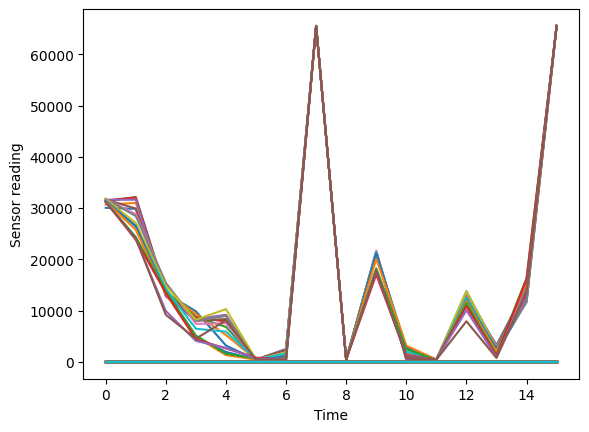

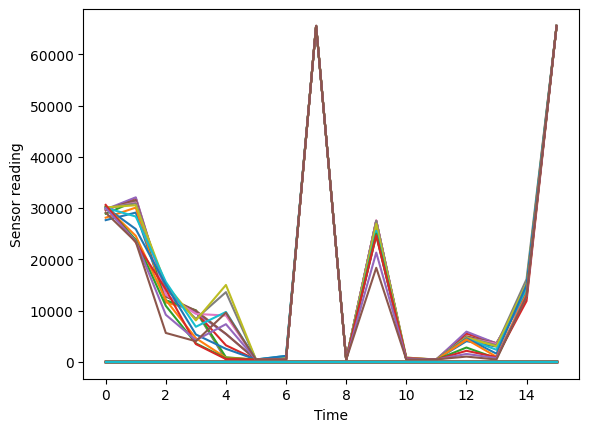

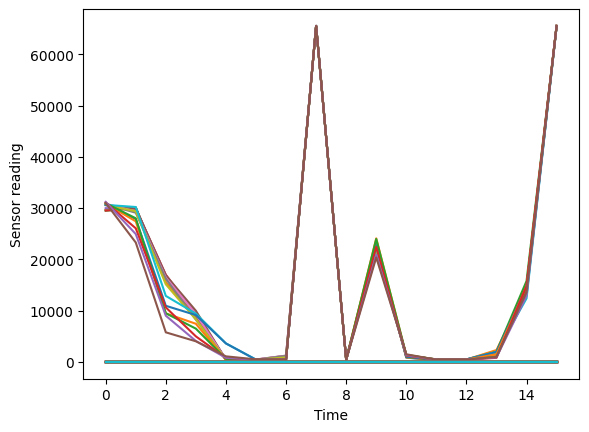

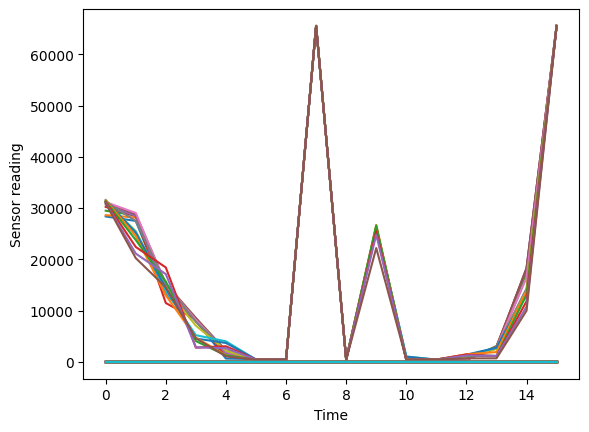

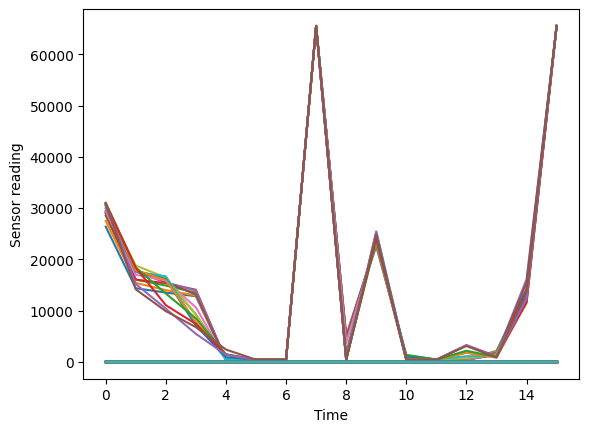

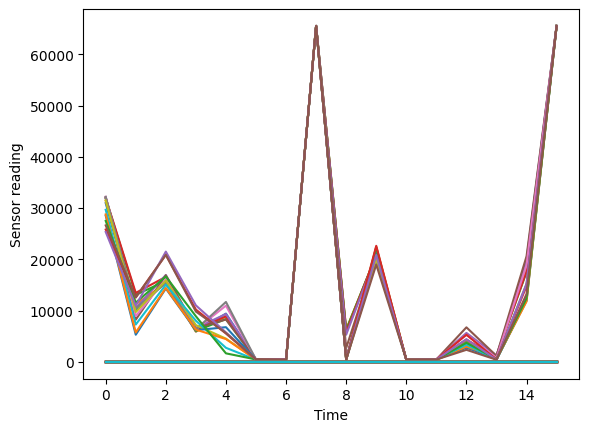

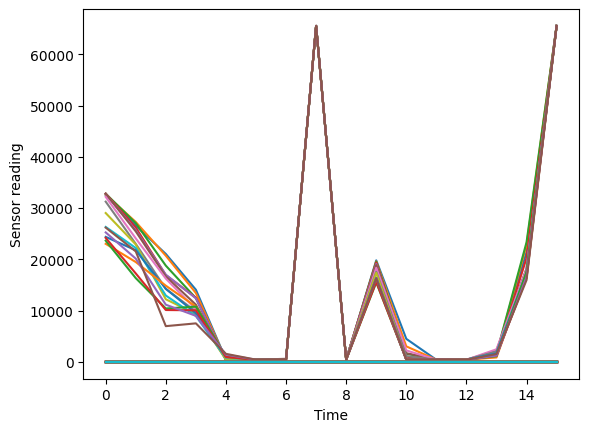

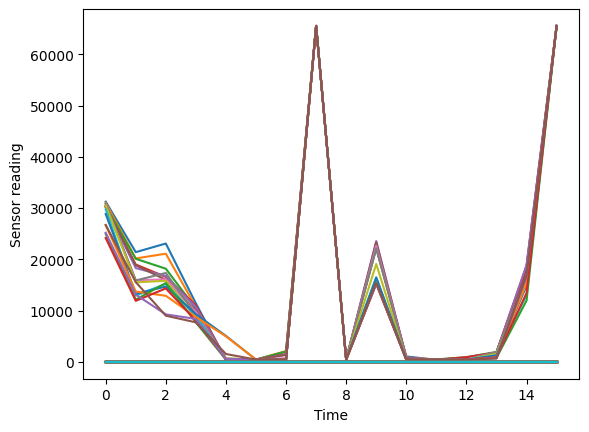

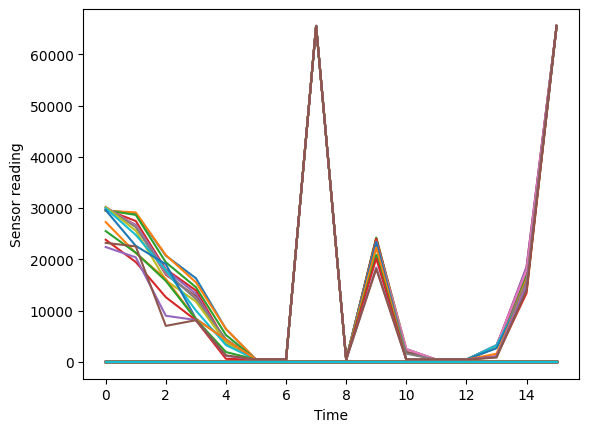

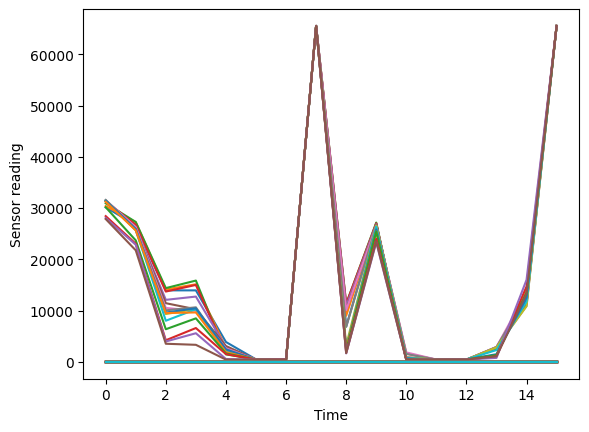

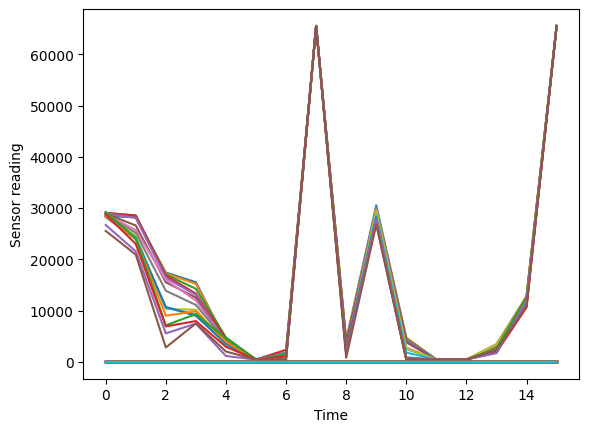

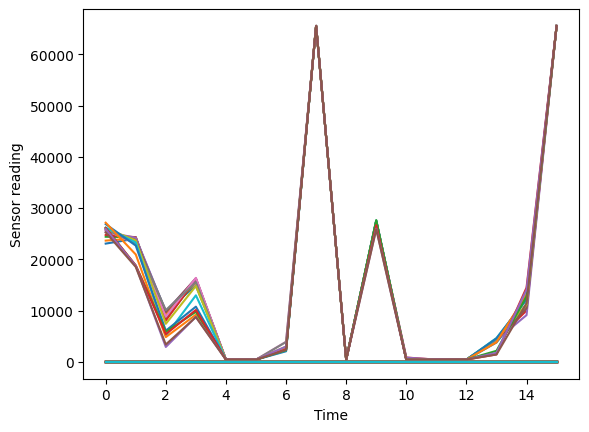

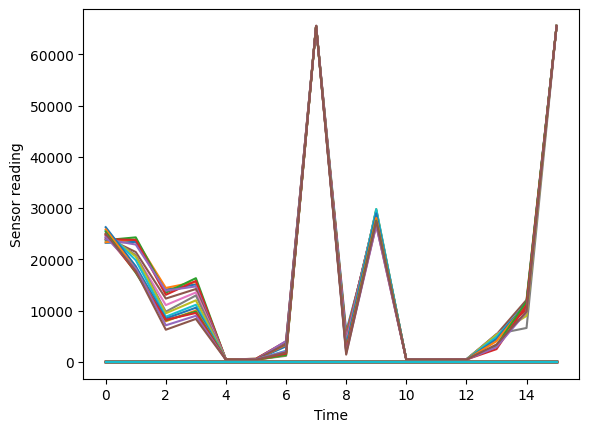

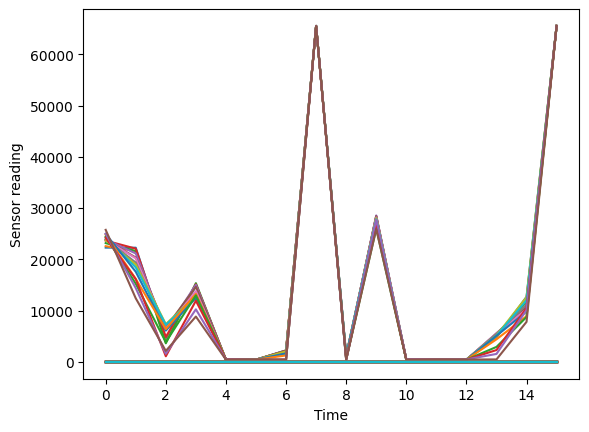

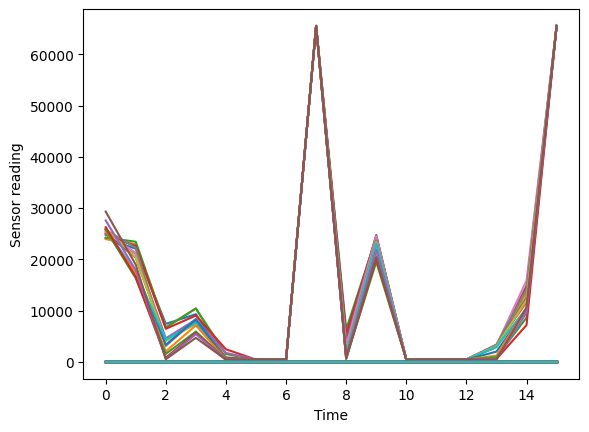

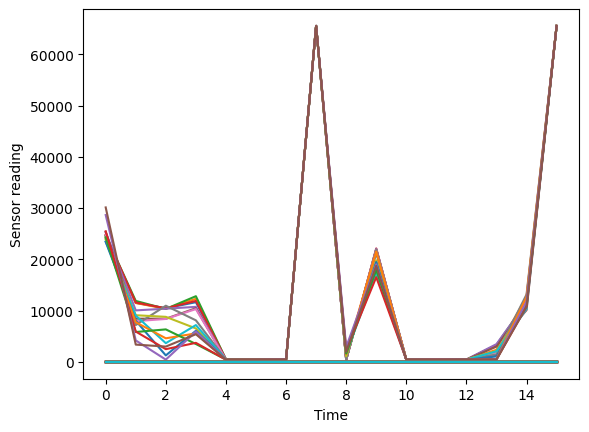

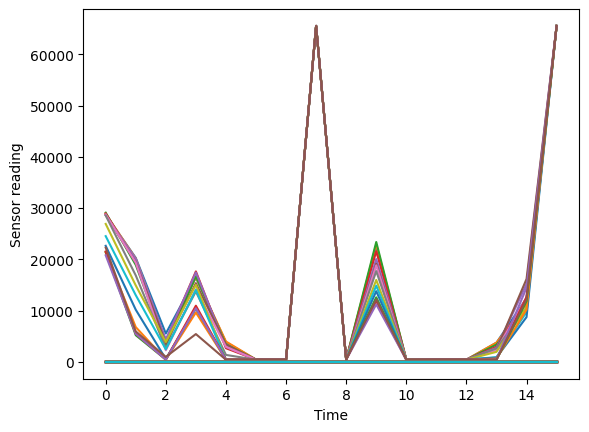

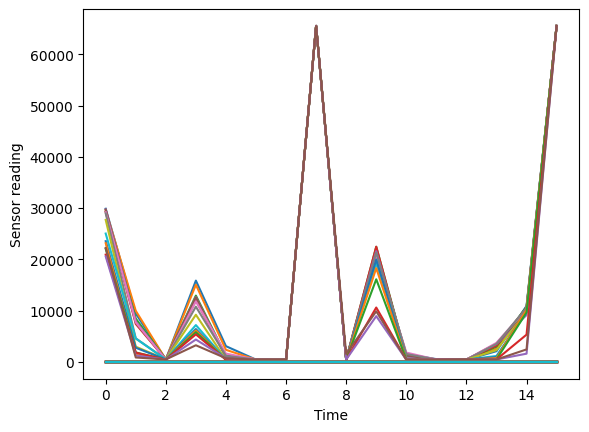

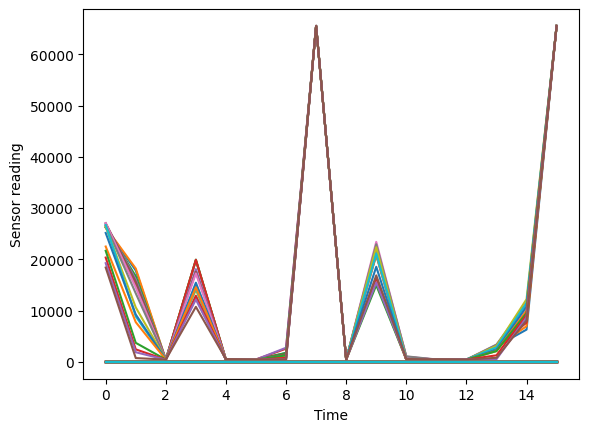

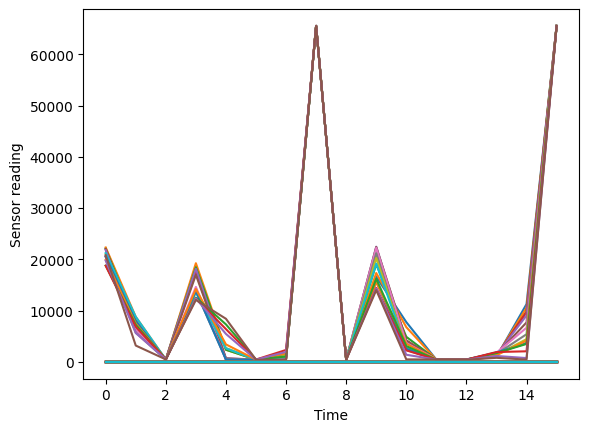

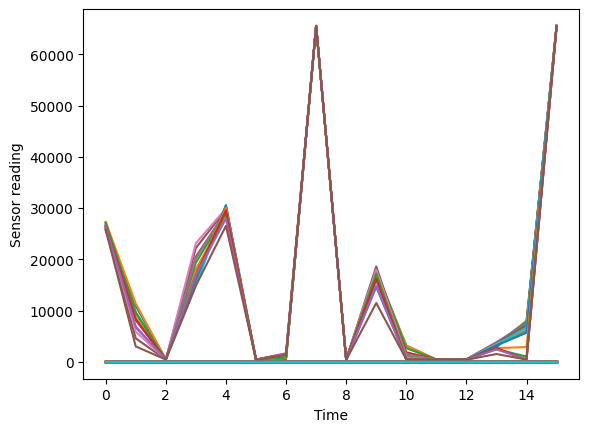

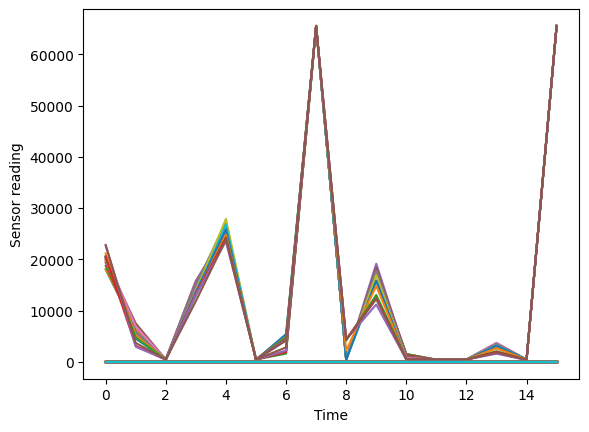

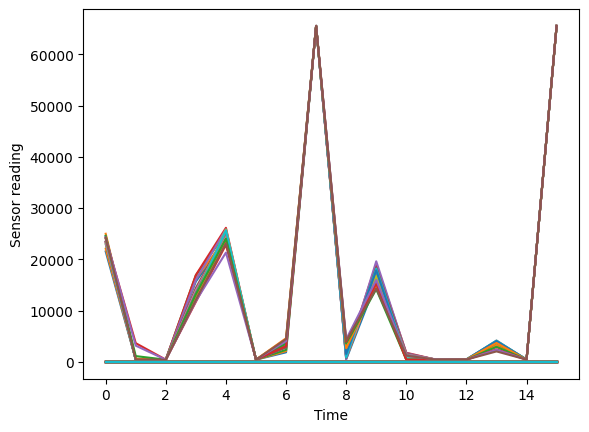

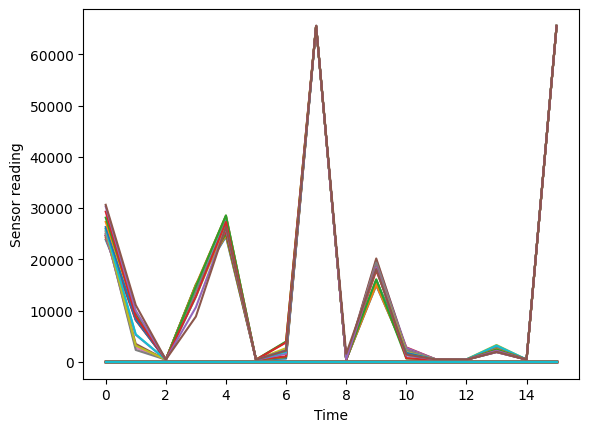

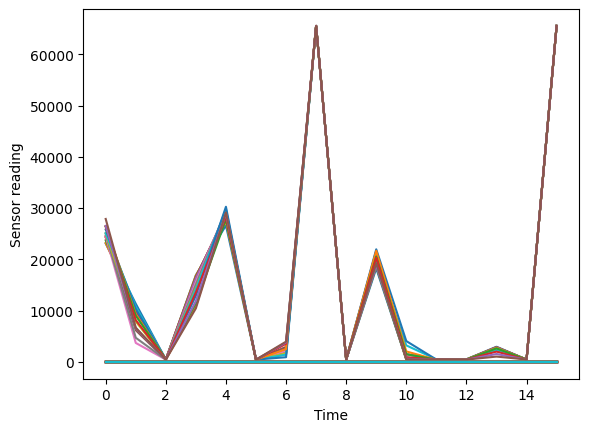

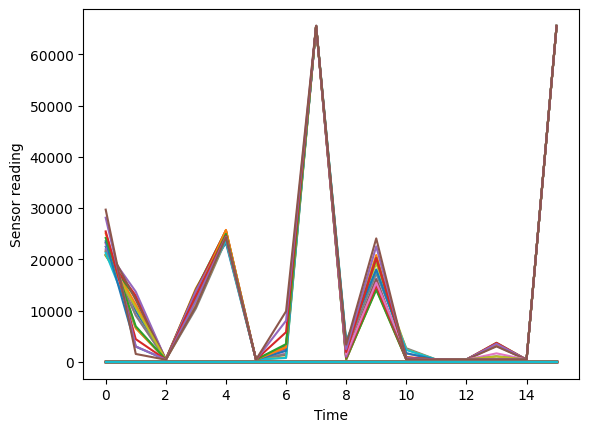

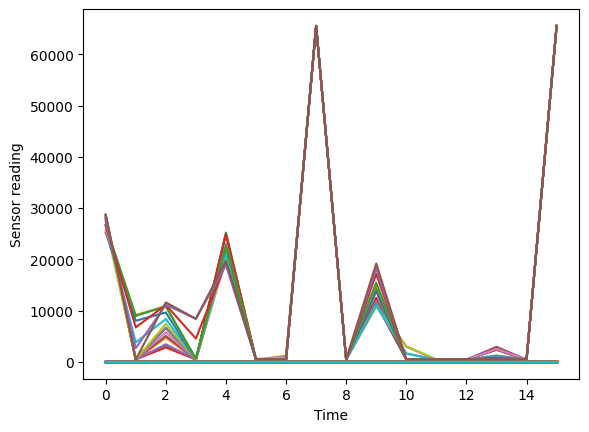

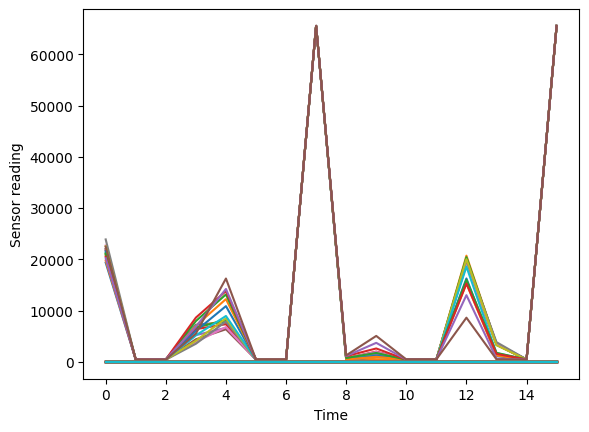

In [29]:
def filter(ar,alpha=0.5):
    smoothed=np.zeros_like(ar)
    smoothed[:,0]=ar[:,0]
    for i in range(len(ar)-1):
        smoothed[:,i+1]=ar[:,i+1]*alpha + (1-alpha)*ar[:,i]
    return smoothed
def visualise(trial):
    plt.plot(filter(trial.T))
    plt.xlabel("Time")
    plt.ylabel("Sensor reading")
    plt.show()

for i in range(100):
    visualise(data[i])
